# Simulated Annealing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(1234)

Create a random function with multiple local maxima.

In [2]:
def random_noise(c=5, init=0, final=100, samples=100, mu=0, std=1):
    """
    Computes a simple noisy signal.
    
    Arguments:
        c(int): scale factor
        init(int): time at start
        final(int): time at end
        points(int): time points
        mu(float): mean of gaussian
        std(float): standard deviation of gaussian
    """
    data = np.linspace(0, final, samples)
    omega = np.random.random()
    noise = c*(np.cos(data) + np.random.normal(mu, std, samples))
    return noise
    

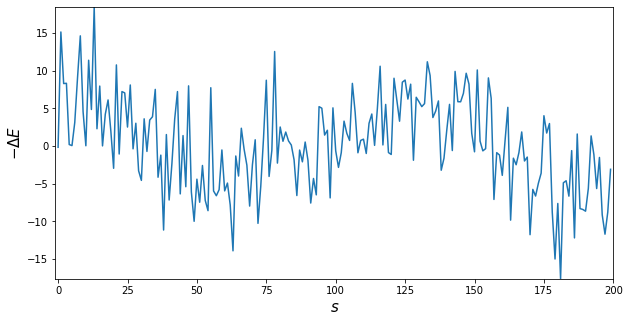

In [3]:
# Calculates random noise (use any function)
noise = random_noise(c=5, final=10, samples=200)

# For plots
ymin, ymax = (min(noise), max(noise))

# Plot raw noise
plt.figure(figsize=(10,5))
plt.plot(noise)
plt.xlim(-1, len(noise))
plt.ylim(ymin, ymax)
plt.xlabel(r"$s$", fontsize=15)
plt.ylabel(r"$-\Delta E$", fontsize=15)
plt.show()

/Users/sgalella/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars


Text(0.5, 1.0, 'T = 0.0')

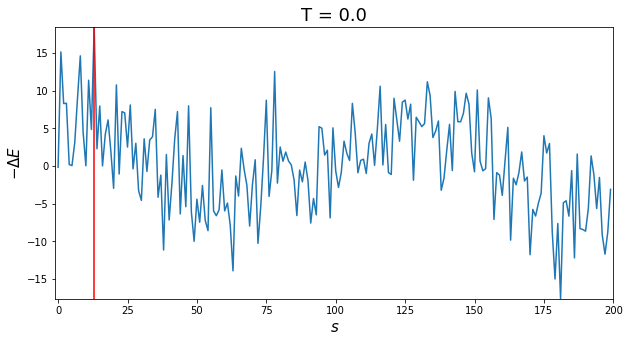

In [4]:
# Simulated Annealing

# Number of total steps
num_steps = 100

# Maximum temperature (at start)
Tmax = 30

# Save a history list to store s over T
s_history = []

# Initialize current s and vector of temperatures
s = np.random.choice(len(noise))
Tvec = np.linspace(Tmax, 0, num_steps)

# Algorithm
for T in Tvec:
    Es = -noise[s]  # Current state
    N = np.random.choice(len(noise))  # Possible next state
    EN = -noise[N]
    deltaE = EN-Es  # Differences of states
    if (deltaE < 0):
        s = N
    elif (1/(1+np.exp(deltaE/T)) > np.random.random()):
        s = N
    s_history.append(s)

# Plot final state        
plt.figure(figsize=(10,5))
plt.plot(noise)
plt.xlim(-1, len(noise))
plt.ylim(ymin, ymax)
plt.plot([s, s],[ymin, noise[s]], 'r')
plt.xlabel(r"$s$", fontsize=15)
plt.ylabel(r"$-\Delta E$", fontsize=15)
plt.title(f"T = {T}", fontsize=18)

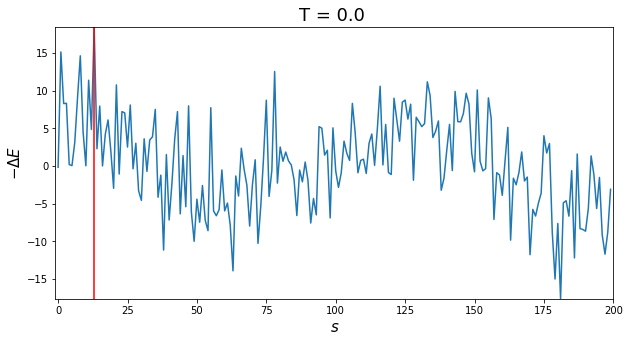

In [5]:
# Store output as .gif

from matplotlib.animation import FuncAnimation

# Define fixed canvas
fig = plt.figure(figsize=(10,5))
ax = plt.axes(xlim=(-1, len(noise)), ylim=(ymin, ymax))
ax.plot(noise)
line, = ax.plot([], [], color="red")
ax.set_xlabel(r"$s$", fontsize=15)
ax.set_ylabel(r"$-\Delta E$", fontsize=15)

def init():
    """
    Initializes canvas
    """
    line.set_data([], [])
    return (line,)

def animate(i):
    """
    Draws each frame.
    
    Arguments:
        i(int) Frame number.
    """
    T = Tvec[i] # i is the frame (here going from -5 to 20)
    s = s_history[i]
    line.set_data([s, s],[ymin, noise[s]])
    ax.set_title("T = {} ".format(round(T,2)), fontsize=18)
    return (line,)

anim = FuncAnimation(fig, animate, init_func=init,
                     frames=len(Tvec), interval=130, blit=True)

anim.save("images/simulated_annealing.gif", writer="imagemagick")